 **Step 1: Download & Understand the Datasets**

In [5]:
import pandas as pd

trades_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

In [6]:
trades_df.head()
trades_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [7]:
sentiment_df.head()
sentiment_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [10]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
import os

project_path = "/content/drive/MyDrive/ds_aditya_boddu"
os.makedirs(project_path, exist_ok=True)
os.makedirs(f"{project_path}/csv_files", exist_ok=True)
os.makedirs(f"{project_path}/outputs", exist_ok=True)


In [12]:
trades_df.to_csv(f"{project_path}/csv_files/cleaned_trades.csv", index=False)
sentiment_df.to_csv(f"{project_path}/csv_files/sentiment_daily.csv", index=False)


In [14]:
os.listdir(f"{project_path}/csv_files")
os.listdir(f"{project_path}/outputs")


[]

**Step 2: Data Cleaning & Standardization**

In [15]:
trades_df.columns = (
    trades_df.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
)

sentiment_df.columns = (
    sentiment_df.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
)


In [17]:
trades_df.columns



Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp'],
      dtype='object')

In [18]:
sentiment_df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [20]:
trades_df['timestamp_ist'] = pd.to_datetime(
    trades_df['timestamp_ist'],
    dayfirst=True,
    errors='coerce'
)


In [21]:
trades_df['trade_date'] = trades_df['timestamp_ist'].dt.date


In [22]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df['sentiment_date'] = sentiment_df['date'].dt.date


In [23]:
trades_df = trades_df.drop(
    columns=['timestamp', 'transaction_hash', 'order_id', 'trade_id']
)


In [24]:
sentiment_df = sentiment_df.drop(columns=['timestamp', 'date'])


In [25]:
trades_df.info()
sentiment_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   account          211224 non-null  object        
 1   coin             211224 non-null  object        
 2   execution_price  211224 non-null  float64       
 3   size_tokens      211224 non-null  float64       
 4   size_usd         211224 non-null  float64       
 5   side             211224 non-null  object        
 6   timestamp_ist    211224 non-null  datetime64[ns]
 7   start_position   211224 non-null  float64       
 8   direction        211224 non-null  object        
 9   closed_pnl       211224 non-null  float64       
 10  crossed          211224 non-null  bool          
 11  fee              211224 non-null  float64       
 12  trade_date       211224 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(6), object(5)
memory usage: 19.5+ M

In [26]:
trades_df.to_csv(f"{project_path}/csv_files/cleaned_trades.csv", index=False)
sentiment_df.to_csv(f"{project_path}/csv_files/sentiment_daily.csv", index=False)

In [27]:
import os
os.listdir(f"{project_path}/csv_files")


['cleaned_trades.csv', 'sentiment_daily.csv']

**Step 3: Feature Engineering**


In [28]:
import pandas as pd

trades_df = pd.read_csv(f"{project_path}/csv_files/cleaned_trades.csv")
sentiment_df = pd.read_csv(f"{project_path}/csv_files/sentiment_daily.csv")


In [29]:
trades_df.head()
trades_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   account          211224 non-null  object 
 1   coin             211224 non-null  object 
 2   execution_price  211224 non-null  float64
 3   size_tokens      211224 non-null  float64
 4   size_usd         211224 non-null  float64
 5   side             211224 non-null  object 
 6   timestamp_ist    211224 non-null  object 
 7   start_position   211224 non-null  float64
 8   direction        211224 non-null  object 
 9   closed_pnl       211224 non-null  float64
 10  crossed          211224 non-null  bool   
 11  fee              211224 non-null  float64
 12  trade_date       211224 non-null  object 
dtypes: bool(1), float64(6), object(6)
memory usage: 19.5+ MB


In [30]:
trades_df['is_profitable'] = trades_df['closed_pnl'] > 0


In [31]:
trades_df['is_profitable'].value_counts()


,count
is_profitable,
False,124355
True,86869


In [32]:
trades_df['trade_volume_usd'] = trades_df['size_usd'].abs()


In [33]:
trades_df['risk_exposure'] = trades_df['trade_volume_usd'] * trades_df.get('leverage', 1)


In [35]:
daily_metrics = trades_df.groupby('trade_date').agg(
    total_pnl=('closed_pnl', 'sum'),
    avg_pnl=('closed_pnl', 'mean'),
    total_volume=('trade_volume_usd', 'sum'),
    trade_count=('closed_pnl', 'count'),
    win_rate=('is_profitable', 'mean')
).reset_index()


In [36]:
daily_metrics.head()
daily_metrics.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trade_date    480 non-null    object 
 1   total_pnl     480 non-null    float64
 2   avg_pnl       480 non-null    float64
 3   total_volume  480 non-null    float64
 4   trade_count   480 non-null    int64  
 5   win_rate      480 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 22.6+ KB


In [37]:
daily_metrics.to_csv(
    f"{project_path}/csv_files/daily_trading_metrics.csv",
    index=False
)


**Step 4: Merge Trading Behavior with Fear–Greed Sentiment**

In [44]:
sentiment_df = sentiment_df.rename(
    columns={'sentiment_date': 'trade_date'}
)



In [45]:
merged_df = pd.merge(
    daily_metrics,
    sentiment_df,
    on='trade_date',
    how='left'
)


In [46]:
merged_df.shape


(480, 8)

In [47]:
merged_df['classification'].isna().sum()


np.int64(1)

In [48]:
merged_df.head()


,trade_date,total_pnl,avg_pnl,total_volume,trade_count,win_rate,value,classification
0,2023-05-01,0.000000,0.000000,477.00,3,0.000000,63.0,Greed
1,2023-12-05,0.000000,0.000000,50005.83,9,0.000000,75.0,Extreme Greed
2,2023-12-14,-205.434737,-18.675885,113203.35,11,0.363636,72.0,Greed
3,2023-12-15,-24.632034,-12.316017,10609.95,2,0.000000,70.0,Greed
4,2023-12-16,0.000000,0.000000,15348.77,3,0.000000,67.0,Greed


In [49]:
merged_df = merged_df.dropna(subset=['classification'])


In [50]:
merged_df.to_csv(
    f"{project_path}/csv_files/merged_trading_sentiment.csv",
    index=False
)


**Step 5: Exploratory Analysis (Fear vs Greed)**

In [51]:
import pandas as pd

merged_df = pd.read_csv(
    f"{project_path}/csv_files/merged_trading_sentiment.csv"
)


In [52]:
merged_df.head()
merged_df['classification'].value_counts()


,count
classification,
Greed,193
Extreme Greed,114
Fear,91
Neutral,67
Extreme Fear,14


In [53]:
fear_df = merged_df[merged_df['classification'] == 'Fear']
greed_df = merged_df[merged_df['classification'] == 'Greed']


In [54]:
comparison = pd.DataFrame({
    'Metric': [
        'Average Daily PnL',
        'Average Trading Volume',
        'Average Trades per Day',
        'Average Win Rate (%)'
    ],
    'Fear': [
        fear_df['total_pnl'].mean(),
        fear_df['total_volume'].mean(),
        fear_df['trade_count'].mean(),
        fear_df['win_rate'].mean() * 100
    ],
    'Greed': [
        greed_df['total_pnl'].mean(),
        greed_df['total_volume'].mean(),
        greed_df['trade_count'].mean(),
        greed_df['win_rate'].mean() * 100
    ]
})

comparison


,Metric,Fear,Greed
0,Average Daily PnL,3.689182e+04,1.114057e+04
1,Average Trading Volume,5.311261e+06,1.495246e+06
2,Average Trades per Day,6.795275e+02,2.606373e+02
3,Average Win Rate (%),3.291124e+01,3.359855e+01


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Fear'].plot(kind='hist', bins=20, title='Fear')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Greed'].plot(kind='hist', bins=20, title='Greed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Metric').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Fear', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Fear', y='Greed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Fear']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Metric')):
  _plot_series(series, series_name, i)
  fig.legend(title='Metric', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Fear')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Greed']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Metric')):
  _plot_series(series, series_name, i)
  fig.legend(title='Metric', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Greed')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Metric')):
  _plot_series(series, series_name, i)
  fig.legend(title='Metric', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Fear'].plot(kind='line', figsize=(8, 4), title='Fear')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Greed'].plot(kind='line', figsize=(8, 4), title='Greed')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Fear', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Greed', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

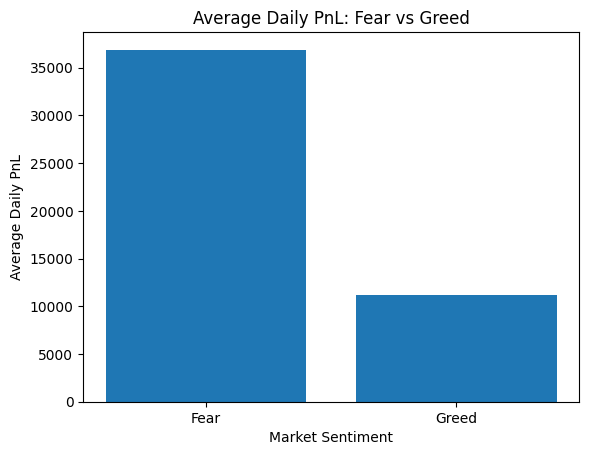

In [55]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(['Fear', 'Greed'],
        [fear_df['total_pnl'].mean(), greed_df['total_pnl'].mean()])
plt.title('Average Daily PnL: Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Daily PnL')
plt.savefig(f"{project_path}/outputs/pnl_fear_vs_greed.png")
plt.show()


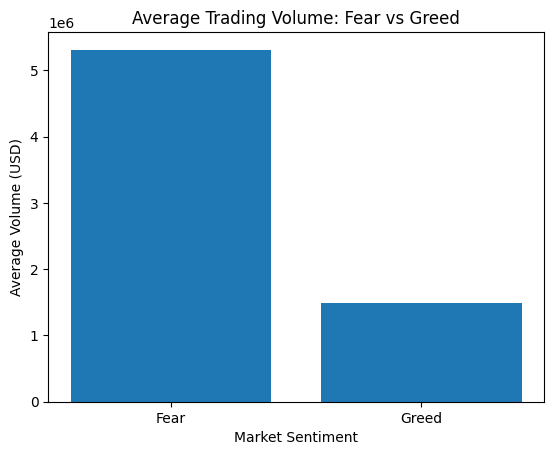

In [56]:
plt.figure()
plt.bar(['Fear', 'Greed'],
        [fear_df['total_volume'].mean(), greed_df['total_volume'].mean()])
plt.title('Average Trading Volume: Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Volume (USD)')
plt.savefig(f"{project_path}/outputs/volume_fear_vs_greed.png")
plt.show()


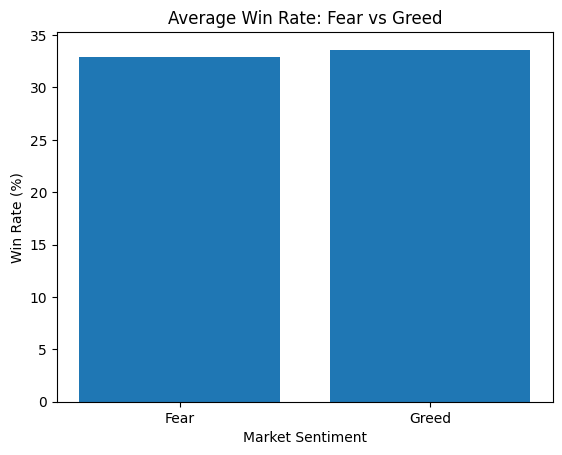

In [57]:
plt.figure()
plt.bar(['Fear', 'Greed'],
        [fear_df['win_rate'].mean() * 100, greed_df['win_rate'].mean() * 100])
plt.title('Average Win Rate: Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Win Rate (%)')
plt.savefig(f"{project_path}/outputs/winrate_fear_vs_greed.png")
plt.show()
